# <a id="0">Exploratory Data Analysis & Pipelines</a>

In this notebook, we go through basic steps of exploratory data analysis (EDA), performing initial data investigations to discover patterns, spot anomalies, and look for insights to inform later ML modeling choices.

    
__Austin Animal Center Dataset__:

In this exercise, we are working with pet adoption data from __Austin Animal Center__. We have two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). 

In order to work with a single table, we joined the intake and outcome tables using the "Animal ID" column and created a single __review.csv__ file. We also didn't consider animals with multiple entries to the facility to keep our dataset simple. If you want to see the original datasets and the merged data with multiple entries, they are available under data/review folder: Austin_Animal_Center_Intakes.csv, Austin_Animal_Center_Outcomes.csv and Austin_Animal_Center_Intakes_Outcomes.csv.

__Dataset schema:__ 
- __Pet ID__ - Unique ID of pet
- __Outcome Type__ - State of pet at the time of recording the outcome (0 = not placed, 1 = placed). This is the field to predict.
- __Sex upon Outcome__ - Sex of pet at outcome
- __Name__ - Name of pet 
- __Found Location__ - Found location of pet before entered the center
- __Intake Type__ - Circumstances bringing the pet to the center
- __Intake Condition__ - Health condition of pet when entered the center
- __Pet Type__ - Type of pet
- __Sex upon Intake__ - Sex of pet when entered the center
- __Breed__ - Breed of pet 
- __Color__ - Color of pet 
- __Age upon Intake Days__ - Age of pet when entered the center (days)
- __Age upon Outcome Days__ - Age of pet at outcome (days)



1. <a href="#1">Overall Statistics</a>
2. <a href="#2">Select Feature Columns</a>
3. <a href="#3">Basic Plots</a>
4. <a href="#4">Impute Missing Values</a>
5. <a href="#5">Preparing Training and Test Datasets</a>
6. <a href="#6">Data Processing with Pipeline</a>



## 1. <a id="=1">Overall Statistics</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_csv('../data/review/review_dataset.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (95485, 13)


We will look at number of rows, columns and some simple statistics of the dataset using [df.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [2]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


[df.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) prints basic statistics for __numerical__ columns.

In [3]:
df.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


In [4]:
df.isnull().sum()

Pet ID                       0
Outcome Type                 0
Sex upon Outcome             1
Name                     36347
Found Location               0
Intake Type                  0
Intake Condition             0
Pet Type                     0
Sex upon Intake              1
Breed                        0
Color                        0
Age upon Intake Days         0
Age upon Outcome Days        0
dtype: int64

## 2. <a id="2">Select Feature Columns</a>
(<a href="#0">Go to top</a>)

Let's separate model features and model target.

In [5]:
print(df.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


In [6]:
model_features = df.columns.drop('Outcome Type')
model_target = 'Outcome Type'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Model target:  Outcome Type


We can explore the features set further, figuring out first what features are numerical or categorical. Beware that some integer-valued features could actually be categorical features, and some categorical features could be text features. 

In [7]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)


Numerical columns: Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')

Categorical columns: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


## 3. <a id="3">Basic Plots</a>
(<a href="#0">Go to top</a>)

In this section, we examine our data with plots. Important note: These plots ignore null (missing) values. We will learn how to deal with missing values in the next section.


__Bar plots__: These plots show counts of categorical data fields. __value_counts()__ function yields the counts of each unique value. It is useful for categorical variables.

First, let's look at the distribution of the model target.

In [8]:
df[model_target].value_counts()

1.0    53854
0.0    41631
Name: Outcome Type, dtype: int64

__plot.bar()__ addition to the __value_counts()__ function makes a bar plot of the values.

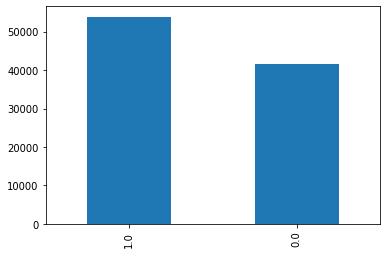

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

Based on the number of unique values (unique IDs for example won't be very useful to visualize, for example), for some categorical features, let's see some bar plot visualizations. For simplicity and speed, here we only show box plots for those features with 10 or less unique values.

Sex upon Outcome


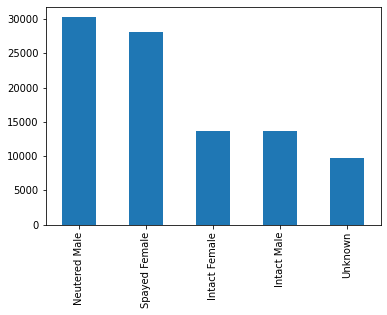

Intake Type


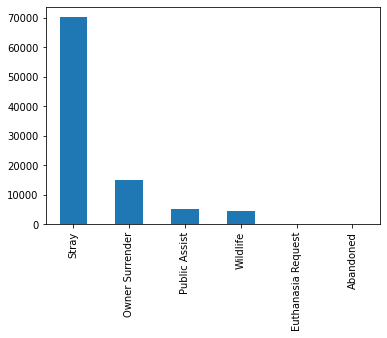

Intake Condition


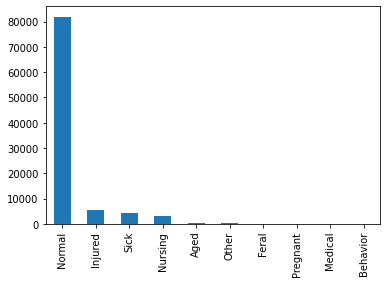

Pet Type


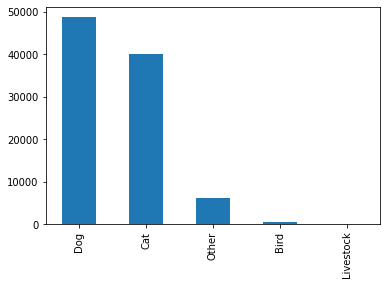

Sex upon Intake


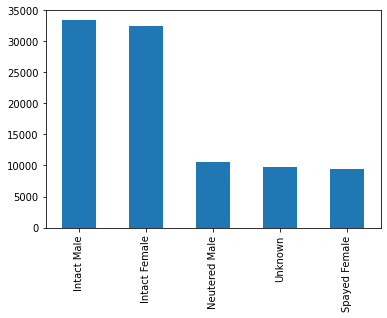

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in categorical_features_all:
    if len(df[c].value_counts()) <= 10:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

__Histograms:__ Histograms show distribution of numeric data. Data is divided into intervals, aka, "buckets" or "bins".

Age upon Intake Days


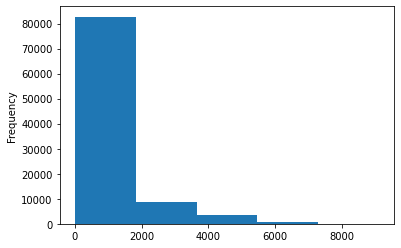

Age upon Outcome Days


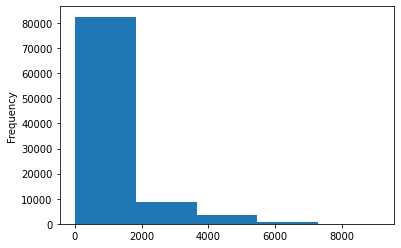

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

Age upon Intake Days


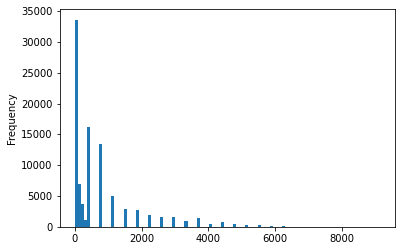

Age upon Outcome Days


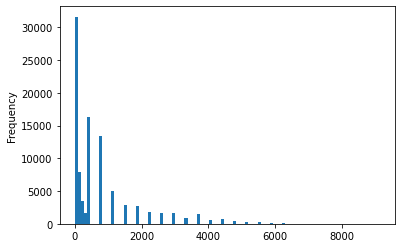

In [12]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=100)
    plt.show()

If for some histograms the values are heavily placed in the first bin, it is good to check for outliers, either checking the min-max values of those particular features and/or explore value ranges.

In [13]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

Age upon Intake Days
min: 0 max: 9125
Age upon Outcome Days
min: 0 max: 9125


With __value_counts()__ function, we can increase the number of histogram bins to 10 for more bins for a more refined view of the numerical features.

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(2737.5, 3650.0]     3998
(1825.0, 2737.5]     3471
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64


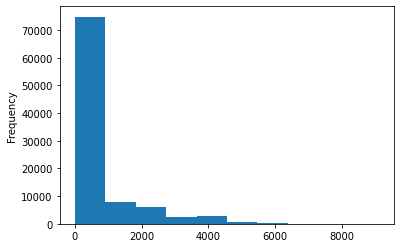

Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(2737.5, 3650.0]     4080
(1825.0, 2737.5]     3465
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64


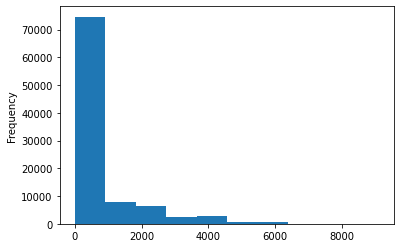

In [14]:
for c in numerical_features_all: 
    print(c)
    print(df[c].value_counts(bins=10))
    df[c].plot.hist(bins=10)
    plt.show()

If any outliers are identified as very likely wrong values, dropping them could improve the numerical values histograms, and later overall model performance. While a good rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, other rules for removing 'outliers' should be considered as well. For example, removing any values in the upper 10%. 

In [15]:
for c in numerical_features_all:
    print(c)
    
    # Drop values below Q1 - 1.5 IQR and beyond Q3 + 1.5 IQR
    #Q1 = df[c].quantile(0.25)
    #Q3 = df[c].quantile(0.75)
    #IQR = Q3 - Q1
    #print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
    
    #dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    #dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    
    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max()*9/10].index
    df.drop(dropIndexes , inplace=True)


Age upon Intake Days
Age upon Outcome Days


Age upon Intake Days
(-6.936, 693.5]     61425
(693.5, 1387.0]     18400
(1387.0, 2080.5]     5657
(2080.5, 2774.0]     3471
(2774.0, 3467.5]     2557
(3467.5, 4161.0]     1962
(4161.0, 4854.5]     1148
(4854.5, 5548.0]      596
(5548.0, 6241.5]      183
(6241.5, 6935.0]       63
Name: Age upon Intake Days, dtype: int64


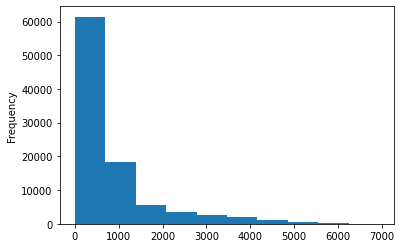

Age upon Outcome Days
(-6.936, 693.5]     61208
(693.5, 1387.0]     18490
(1387.0, 2080.5]     5643
(2080.5, 2774.0]     3465
(2774.0, 3467.5]     2600
(3467.5, 4161.0]     2004
(4161.0, 4854.5]     1196
(4854.5, 5548.0]      604
(5548.0, 6241.5]      187
(6241.5, 6935.0]       65
Name: Age upon Outcome Days, dtype: int64


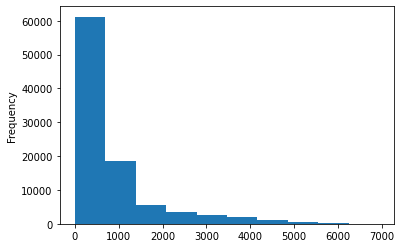

In [16]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10))
    df[c].plot.hist(bins=10)
    plt.show()

### Scatter Plot and Correlation Matrix
We plot the correlation matrix. Correlation scores are calculated for numerical fields. 

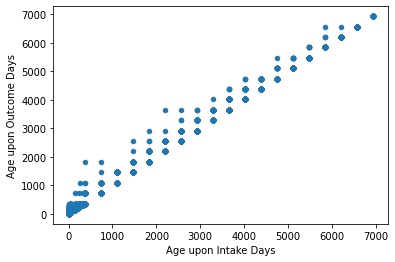

In [17]:
df.plot.scatter(numerical_features_all[0], numerical_features_all[1])
plt.show()

In [18]:
cols=[numerical_features_all[0], numerical_features_all[1]]
print(df[cols].corr())

                       Age upon Intake Days  Age upon Outcome Days
Age upon Intake Days               1.000000               0.998839
Age upon Outcome Days              0.998839               1.000000


Similar to scatterplots, but now the correlation matrix values can more clearly pinpoint relationships between the numerical features. Correlation values of -1 means perfect negative correlation, 1 means perfect positive correlation, and 0 means there is no relationship between the two numerical features.

## 4. <a id="4">Impute Missing Values</a>
(<a href="#0">Go to top</a>)

### Impute (fill-in) missing values with .fillna()


Rather than dropping rows (data samples) and/or columns (features), another strategy to deal with missing values would be to actually complete the missing values with new values: imputation of missing values.

__Imputing Numerical Values:__ The easiest way to impute numerical values is to get the __average (mean) value__ for the corresponding column and use that as the new value for each missing record in that column. 

An elegant way to implement imputation is using sklearn's __SimpleImputer__, a class implementing .fit() and .transform() methods.

In [19]:
# Impute numerical columns by using the mean per column to replace the nans

from sklearn.impute import SimpleImputer

# make another copy of our current dataframe
df_sklearn_imputed = df.copy()
df_sklearn_imputed[numerical_features_all].isnull().sum()

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

In [20]:
imputer = SimpleImputer(strategy='mean')
df_sklearn_imputed[numerical_features_all] = imputer.fit_transform(df_sklearn_imputed[numerical_features_all])

print(df_sklearn_imputed[numerical_features_all].isnull().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


## 5. <a id="5">Preparing Training and Test Datasets</a>
(<a href="#0">Go to top</a>)

We split our dataset into training (90%) and test (10%) subsets using sklearn's [__train_test_split()__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [21]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1, shuffle=True, random_state=42)

#### Target Balancing

In [22]:
print('Training set shape:', train_data.shape)

print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))

print('Class 0 samples in the test set:', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set:', sum(test_data[model_target] == 1))

Training set shape: (85915, 13)
Class 0 samples in the training set: 37463
Class 1 samples in the training set: 48452
Class 0 samples in the test set: 4156
Class 1 samples in the test set: 5391


__Important note:__ We want to fix the imbalance only in training set. We shouldn't change the validation and test sets, as these should follow the original distribution.

In [23]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target] == 0]
class_1_no = train_data[train_data[model_target] == 1]

upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

train_data = pd.concat([class_1_no, upsampled_class_0_no])
train_data = shuffle(train_data)

In [24]:
print('Training set shape:', train_data.shape)

print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))
print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))

Training set shape: (96904, 13)
Class 1 samples in the training set: 48452
Class 0 samples in the training set: 48452


## 6. <a id="6">Data Processing with Pipeline</a>
(<a href="#0">Go to top</a>)

In a typical machine learning workflow you will need to apply data transformations, like imputation and scaling shown here, at least twice. First on the training dataset with __.fit()__ and __.transform()__, when preparing the data to training the model. And again, on any new data you want to predict on, with __.transform()__. Scikit-learn [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) is a tool that simplifies this process by enforcing the implementation and order of data processing steps. 

We build a pipeline to impute the missing values with the mean using sklearn's SimpleImputer, scale the numerical features to have similar orders of magnitude by bringing them into the 0-1 range with sklearn's MinMaxScaler, and finally train a KNN Classifier or ([Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) on the imputed and scaled dataset. 

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

### PIPELINE ###
################

# Pipeline desired data transformers, along with an estimator at the end
# For each step specify: a name, the actual transformer/estimator with its parameters
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])

In [26]:
# Get train data to train the classifier
X_train = train_data[numerical_features_all]
y_train = train_data[model_target]

# Fit the classifier to training data
# Train data going through the Pipeline it's first imputed, then scaled, and finally used to fit the estimator
classifier.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

In [27]:
# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Use the fitted model to make predictions on the train dataset
# Train data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Model performance on the train set:
[[27615 20837]
 [16572 31880]]
              precision    recall  f1-score   support

         0.0       0.62      0.57      0.60     48452
         1.0       0.60      0.66      0.63     48452

    accuracy                           0.61     96904
   macro avg       0.61      0.61      0.61     96904
weighted avg       0.61      0.61      0.61     96904

Train accuracy: 0.6139581441426567


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Get test data to test the classifier
X_test = test_data[numerical_features_all]
y_test = test_data[model_target]

# Use the fitted model to make predictions on the test dataset
# Test data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the test set:
[[2321 1835]
 [1880 3511]]
              precision    recall  f1-score   support

         0.0       0.55      0.56      0.56      4156
         1.0       0.66      0.65      0.65      5391

    accuracy                           0.61      9547
   macro avg       0.60      0.60      0.60      9547
weighted avg       0.61      0.61      0.61      9547

Test accuracy: 0.6108725254006494
